In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

class World:
    def __init__(self, size, tolerance):
        self.tolerance = tolerance                                      #how many neighbors needed to be happy
        self.sqrWorld = size                                            #defining the width/height of square world
        self.count = 0                                                  #used in moveAgent method to calculate the number of moves that were made becuase the agent picked was unhappy (changes across tolerance)
        self.totalHomes = self.sqrWorld ** 2                            #total number of houses in world
        self.numAgents = math.floor(self.totalHomes* .9)                 #number of agents = 90% of total homes
        self.space = np.zeros([self.sqrWorld, self.sqrWorld])           #defining the space in which agents will live
        
        for num in range(self.numAgents):                               #looping over numAgents to create each agent/starting world
            iscomplete = False
            while iscomplete == False:
                x = random.randint(0, self.sqrWorld-1)
                y = random.randint(0, self.sqrWorld-1)
                
                if num % 2 == 0:                                        # setting even vs odd num agent to 1 vs 2 to get 50 50 split 
                    color = 1
                else:
                    color = -1
               
                if self.space[x,y] == 0:
                    self.space[x,y] = color                             #saving agent defined as 1 or 2 to speicifc location in space array       
                    iscomplete = True

    def isValidHome(self, x, y, color):                                 
        if x < 0 or x >= self.sqrWorld or y < 0 or y >= self.sqrWorld:  #if square/home is outside of bounds of space then return 0 becuase it doesnt exist and will be ignored for happiness rating
            return 0

        return color == self.space[x, y]                                #if square is inside bounds of space then we want to return true or false if it is the same color as the randomly picked agent, this will be used in check Neighbors funcion 

    def checkNeighbors(self, x, y):                                     #wont be called on instances of World, but will be use in pickAgent()
        (xOne, yOne) = (x+1 , y)                                        # creating all possible square location to check 
        (xTwo, yTwo) = (x-1 , y)
        (xThree, yThree) = (x , y+1)
        (xFour, yFour) = (x, y -1)

        currentColor = self.space[x,y]                                          
        count = 0

        if self.isValidHome(xOne, yOne, currentColor):                  #if square is valid and also same color (== True from isValidHome) then will add one to count
            count += 1
        if self.isValidHome(xTwo, yTwo, currentColor):
            count += 1
        if self.isValidHome(xThree, yThree, currentColor):
            count += 1
        if self.isValidHome(xFour, yFour, currentColor):
            count += 1

        return count                                                    

    def pickAgent(self):                                                #wont be called on instances of World, but will be used in moveAgent()
        while True:
            x = random.randint(0, self.sqrWorld-1)
            y = random.randint(0, self.sqrWorld-1)
            if self.space[x,y] != 0:                                    # want to pick agents who are not == 0 becuase that means empty house
                return (x, y)

    def moveAgent(self):
        (agentx, agenty) = self.pickAgent()

        if self.checkNeighbors(agentx,agenty) >= self.tolerance:        # Check if agent is already happy, then end early
            return

        homeFound = False
        while homeFound == False:
            x = random.randint(0, self.sqrWorld-1)
            y = random.randint(0, self.sqrWorld-1)
            if self.space[x,y] == 0:
                self.space[x,y] = self.space[agentx, agenty]            #saving agent defined as 1 or 2 to speicifc location in space array       
                homeFound = True                                        
                self.space[agentx, agenty] = 0                          #setting ould space to zero after moved
                self.count = self.count+1

    def plot(self):
        plt.imshow(self.space, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()
    
    def segIndex(self):
        count = 0
        for x in range(self.sqrWorld):
            for y in range(self.sqrWorld):
                if self.space[x, y] != 0:
                    count += self.checkNeighbors(x, y)
        
        average = count/self.numAgents
        return average

In [2]:
def run(size, tolerance):
    world = World(size, tolerance)
    moves = 1000000
    world.plot()
    for i in range(moves):
        world.moveAgent()
    world.plot()
    print(world.count)

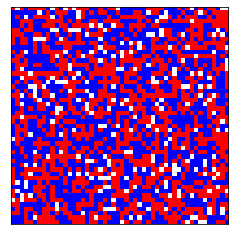

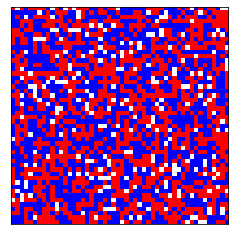

0


In [3]:
#(3 points) What happens when the agents become more/less tolerant? Show the final outcome for each different threshold of happiness. Interpret your results (as in, explain what you get for threshold = 0, 1, 2, ... 8 and why you think you see the results that you see).

# I made my world by checking only 4 neighbors, meaning that I did not check the diagnol neighbors 
# tolerance level of equal to or greater than 0 neighbors that are the same color 
run(50, 0)
# the last number printed == 0 which refers to the number of times that an agent moved. Agents only move if they are unhappy and here the tolerance is set to 0 so people never move

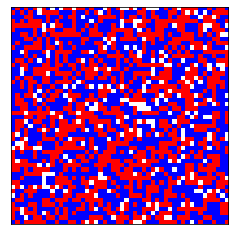

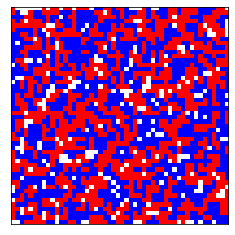

274


In [4]:
 # tolerance level of equal to or greater than 1 neighbors that are the same color 
run(50, 1)
# the last number printed is in the hundreds usually, which refers to the number of times that an agent moved. Agents only move if they are unhappy and here the tolerance is set to 1 so people dont move that frequently 

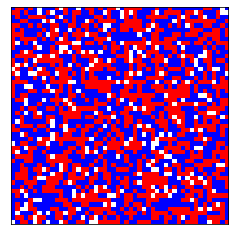

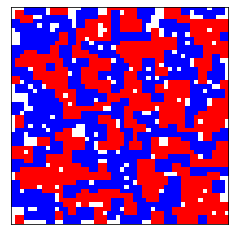

1842


In [5]:
# tolerance level of equal to or greater than 2 neighbors that are the same color 
run(50, 2)
# the last number printed is in the thousands usually, which refers to the number of times that an agent moved. Agents only move if they are unhappy and here the tolerance is set to 2 so people are starting to move and segregate

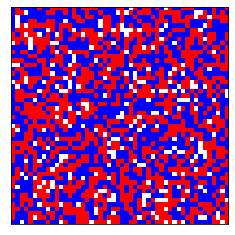

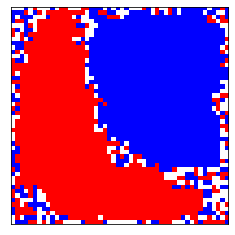

183013


In [6]:
# tolerance level of equal to or greater than 3 neighbors that are the same color
run(50, 3) 
# the last number printed is in the hundred thousands usually, 
# which refers to the number of times that an agent moved. 
# Agents only move if they are unhappy and here the tolerance is set to 3 
# so people moved a lot and there is a lot of segregation

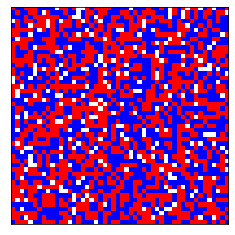

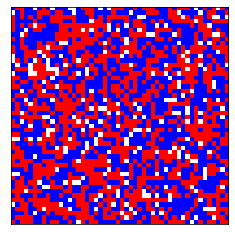

944300


In [7]:
# tolerance level of equal to or greater than 4 neighbors that are the same color
run(50, 4) # these agents seem to remain random becuase they are never happy and constantly moving, 
#but clusters are not forming... maybe there are too little vacancies for them to move into and start clustering
# where all neighbors would be the same becuase checking 4 neighbors so need 4/4 neighbors as your color to be happy

In [8]:
#(3 points) Define a statistic that measures the degree of segregation. 
# Add this as a method to the class. Call the method segindex(). 
# Plot this statistic over time. Plot it for one threshold of your choice.

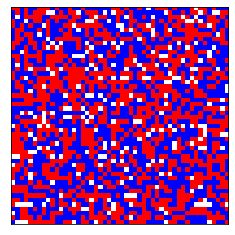

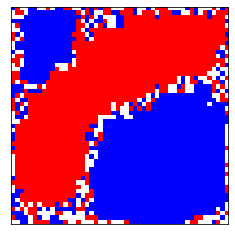

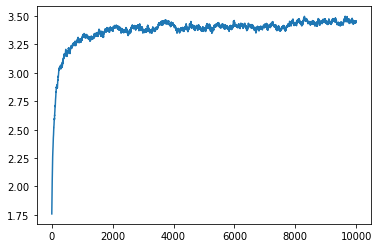

In [9]:
def run_segregation(size, tolerance):
    world = World(size, tolerance)
    moves = 1000000
    segChange = []
    world.plot()
    for i in range(moves):
        world.moveAgent()
        if i % 100 == 0:
            segChange.append(world.segIndex())
    world.plot()
    plt.plot(segChange)

run_segregation(50, 3)

In [10]:
#Here I plotted the degree of segregation as the average number of neighbors who are the same color as you over time. 
# The tolerance is set at 3, so when the agents are moving they are unhappy unless 3/4 neighbors are the same color. 

In [11]:
#(3 points) Let's revisit the first question but now using this more succint measurement. 
# How does the tolerance or threshold of happiness affect the final segregation index? 
# To answer this question, plot the final segregation threshold as a function of threshold. 
# Does your segregation index capture well the results that you observed from your experiment in question 1? 
# If not, fix your segregation index so that it does. Interpret your results.

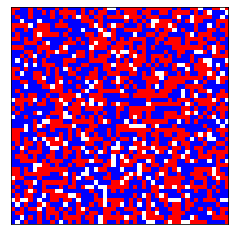

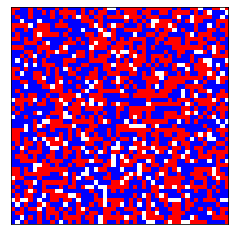

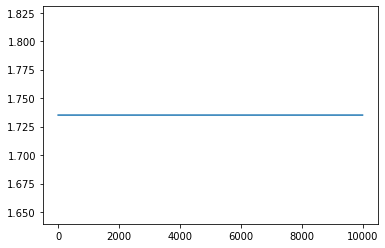

In [12]:
run_segregation(50, 0)
#this segregation index matches my expected prediciton, becuase tolerance is set at 0 no one moves 
# and the degree of segregation doesn't change

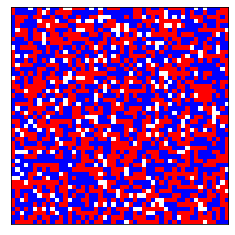

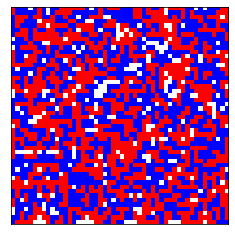

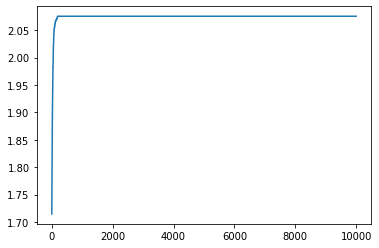

In [13]:
run_segregation(50, 1)
#this matches my assumptions becuase the tolerance level is set pretty low, 
# we still see some segregation happening but the clusters are very small, 
# most people have 2 neighbors that are different color and two that are same color on average

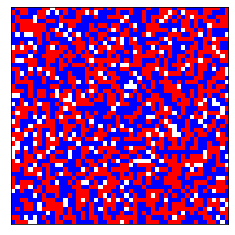

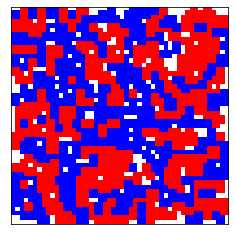

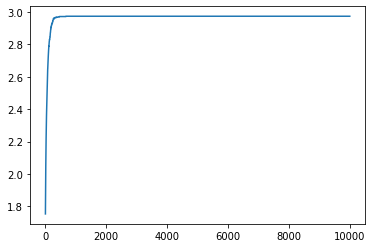

In [14]:
run_segregation(50, 2)
#this matches my assumptions becuase the tolerance level is set at 2 we start to see more segregation,
# which is reflected in the segregation index increasing to 3 so most people are in "neighborhoods" that reflect their color 

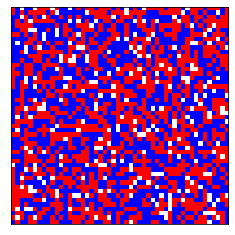

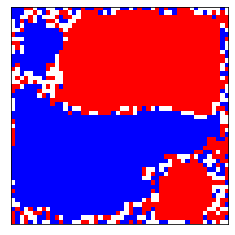

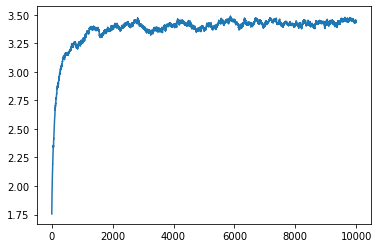

In [15]:
run_segregation(50, 3)
#this matches my assumptions becuase the tolerance level is set high at 3 
# we see two big clusters of color and the segregation index has again increased 
# and is getting pretty close to 3.5 

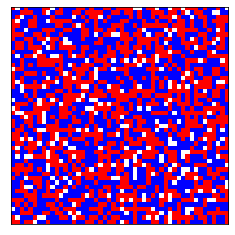

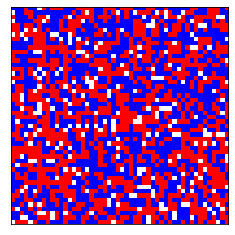

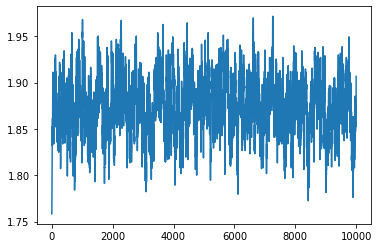

In [16]:
run_segregation(50, 4)
#again this matches my assumption becuase we dont see segregation here 
# and our segregation index is all over the place jsut below 2 - 
# reflecting the randomness becuase no one is happy and keeps moving becuase cant get 4/4 neighbors 
# to be the same color and clusters cant form.
# I think if we increased the number of vacancies than we would see clusters from at this tolerance level (to be tested)

In [17]:
#(3 points) Now that your segregation index works well, let's ask more questions about this model to understand it better. 
# Let's discuss the role of vacant homes: How does vacancy affect the final segregation index of the city? 
# To answer this question, pick a threshold and keep it fixed, and instead vary the proportion of vacancies systematically from 0 to 1. 
# Make sure you make a hypothesis and even write it down, before you run your experiment. 
# Did what you think would happen happened? Explain whether your prediction matched the results.

# HYPOTHESIS: I am going to work with my max threshold of 4/4 neighbors, becuase I have a hypothesis that if we increase 
# the vacancies then we will see segregation at this threshold if there are less than .3 vacancies I do not think we will 
# see segregation

In [18]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

class World2:
    def __init__(self, size, tolerance, vacancy):
        self.tolerance = tolerance                                      #how many neighbors needed to be happy
        self.sqrWorld = size                                            #defining the width/height of square world
        self.vacancy = vacancy
        self.count = 0                                                  #used in moveAgent method to calculate the number of moves that were made becuase the agent picked was unhappy (changes across tolerance)
        self.totalHomes = self.sqrWorld ** 2                            #total number of houses in world
        self.numAgents = math.floor(self.totalHomes* (1-self.vacancy))                 #number of agents = 90% of total homes
        self.space = np.zeros([self.sqrWorld, self.sqrWorld])           #defining the space in which agents will live
        
        for num in range(self.numAgents):                               #looping over numAgents to create each agent/starting world
            iscomplete = False
            while iscomplete == False:
                x = random.randint(0, self.sqrWorld-1)
                y = random.randint(0, self.sqrWorld-1)
                
                if num % 2 == 0:                                        # setting even vs odd num agent to 1 vs 2 to get 50 50 split 
                    color = 1
                else:
                    color = -1
               
                if self.space[x,y] == 0:
                    self.space[x,y] = color                             #saving agent defined as 1 or 2 to speicifc location in space array       
                    iscomplete = True

    def isValidHome(self, x, y, color):                                 
        if x < 0 or x >= self.sqrWorld or y < 0 or y >= self.sqrWorld:  #if square/home is outside of bounds of space then return 0 becuase it doesnt exist and will be ignored for happiness rating
            return 0

        return color == self.space[x, y]                                #if square is inside bounds of space then we want to return true or false if it is the same color as the randomly picked agent, this will be used in check Neighbors funcion 

    def checkNeighbors(self, x, y):                                     #wont be called on instances of World, but will be use in pickAgent()
        (xOne, yOne) = (x+1 , y)                                        # creating all possible square location to check 
        (xTwo, yTwo) = (x-1 , y)
        (xThree, yThree) = (x , y+1)
        (xFour, yFour) = (x, y -1)

        currentColor = self.space[x,y]                                          
        count = 0

        if self.isValidHome(xOne, yOne, currentColor):                  #if square is valid and also same color (== True from isValidHome) then will add one to count
            count += 1
        if self.isValidHome(xTwo, yTwo, currentColor):
            count += 1
        if self.isValidHome(xThree, yThree, currentColor):
            count += 1
        if self.isValidHome(xFour, yFour, currentColor):
            count += 1

        return count                                                    

    def pickAgent(self):                                                #wont be called on instances of World, but will be used in moveAgent()
        while True:
            x = random.randint(0, self.sqrWorld-1)
            y = random.randint(0, self.sqrWorld-1)
            if self.space[x,y] != 0:                                    # want to pick agents who are not == 0 becuase that means empty house
                return (x, y)

    def moveAgent(self):
        (agentx, agenty) = self.pickAgent()

        if self.checkNeighbors(agentx,agenty) >= self.tolerance:        # Check if agent is already happy, then end early
            return

        homeFound = False
        while homeFound == False:
            x = random.randint(0, self.sqrWorld-1)
            y = random.randint(0, self.sqrWorld-1)
            if self.space[x,y] == 0:
                self.space[x,y] = self.space[agentx, agenty]            #saving agent defined as 1 or 2 to speicifc location in space array       
                homeFound = True                                        
                self.space[agentx, agenty] = 0                          #setting ould space to zero after moved
                self.count = self.count+1

    def plot(self):
        plt.imshow(self.space, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()
    
    def segIndex(self):
        count = 0
        for x in range(self.sqrWorld):
            for y in range(self.sqrWorld):
                if self.space[x, y] != 0:
                    count += self.checkNeighbors(x, y)
        
        average = count/self.numAgents
        return average

In [19]:
def run_segregation2(size, tolerance, vacancy):
    world = World2(size, tolerance, vacancy)
    moves = 1000000
    segChange = []
    world.plot()
    for i in range(moves):
        world.moveAgent()
        if i % 100 == 0:
            segChange.append(world.segIndex())
    world.plot()
    plt.plot(segChange)

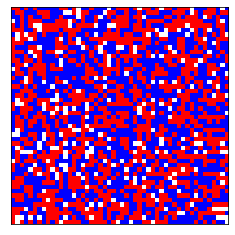

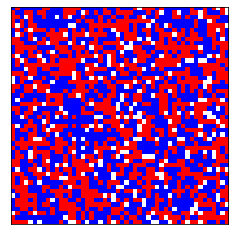

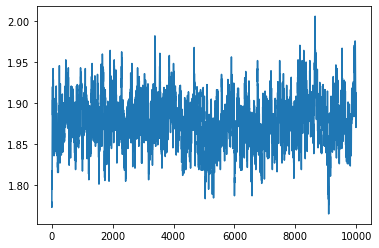

In [20]:
# vacancy == 0 , we cant run this becuase my while loop in moveAgent method will look for vacant lot forever...
# vacancy == .1 (below), we have seen this earlier, segregation does not happen even though people are super unhappy 
# becuase clusters cant form
run_segregation2(50, 4, .1)

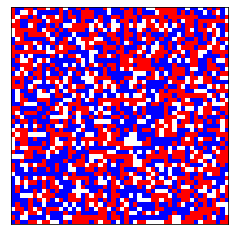

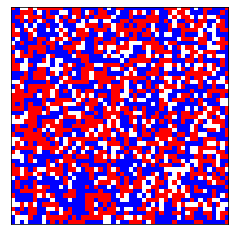

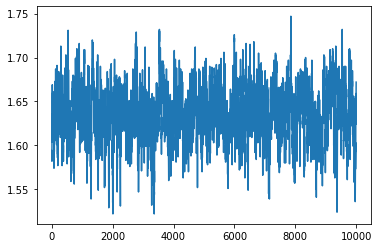

In [21]:
# vacancy == .2 - still random/no clusters really forming...
# maybe some clusters compared to earlier but still lots of unhappy folks since threshold for happiness is so high
run_segregation2(50, 4, .2)

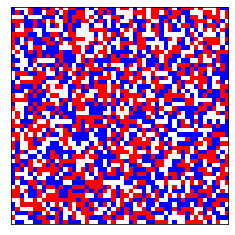

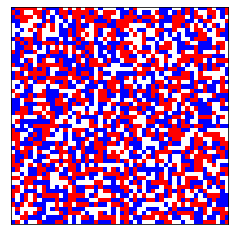

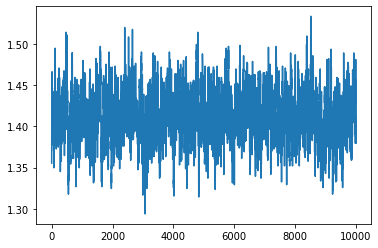

In [22]:
# vacancy == .3 - still random/no clusters really forming... 
# maybe some clusters compared to earlier but still lots of unhappy folks since threshold for happiness is so high
run_segregation2(50, 4, .3)

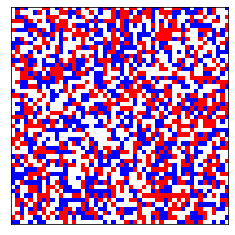

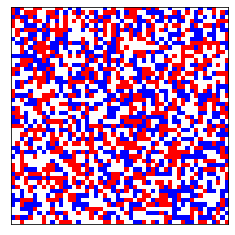

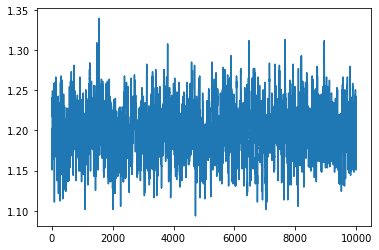

In [23]:
# vacancy == .4 - seems like these may be even smaller or more sparse clusters than at .3 vaccancy
# ... so far my hypothesis has failed ... segregation is actually going down with increased vacancies...
run_segregation2(50, 4, .4)

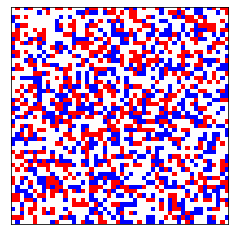

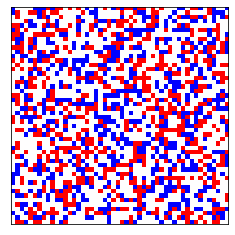

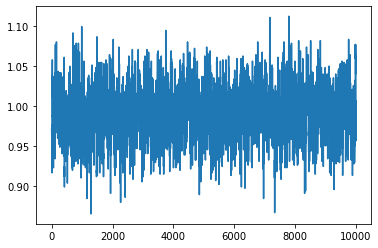

In [24]:
# vacancy == .5 - still no clustering happening really,
#  at this point people are already looking pretty spread out, 
# so they are happy just by beign alone... again segregation is going down 
run_segregation2(50, 4, .5)

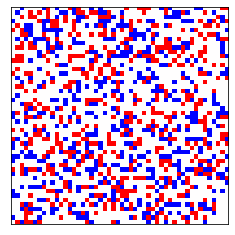

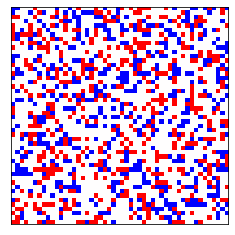

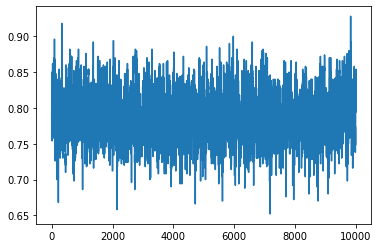

In [25]:
# vacancy == .6 - segregation is considered soooo low 
# beucase people are so spread out,
#  so even though they only want to be by people who are the same color (want 4/4 neighbors same)
# segregation looks low at this high vacancy
run_segregation2(50, 4, .6)

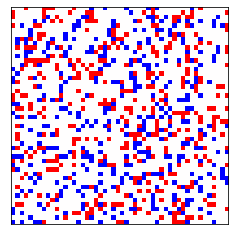

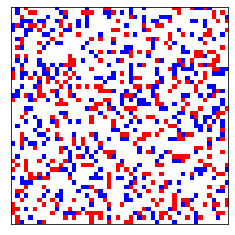

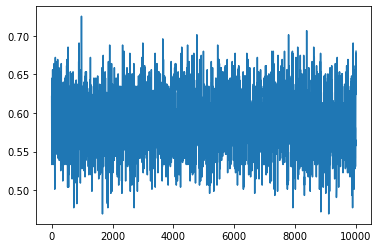

In [26]:
# vacancy == .7 - 
# I am going to call it good at this level of vacancy 
# becuase the way this is going is pretty clear... 
# It is intersting that at this high of a threshold for happiness 
# (aka want 4/4 neighbors to be the same otherwise will move) 
# we do not see the giant segregation bubbles happening like we did at a threshold of 3. 
# Mostly, this is becuase big clusters cant form at low vacancies becuase it is hard to meet 
# happines requirements/find ppl same color as you 
# and then at higher vacancies (basically starting at .3-.4 vacancy percentage) 
# the segregation index actually goes down because people are spread out, 
# so it looks like they might have a low tolerance threshold (i.e., happy living by whoever) but it is actually the opposite. 
run_segregation2(50, 4, .7)

In [27]:
#(8 points) Open ended. Select one way to extend/modify the model. Find a question to ask about the model (like the questions before this one). Answer your question with an experiment and visualize it with a figure. Interpret and discuss your results.

# make vacant homes count negativley toward happiness!! - how does that impact the degree of segreation/ do we reach segregation earlier vs later?

import random
import matplotlib.pyplot as plt
import numpy as np
import math

class World3:
    def __init__(self, size, tolerance, vacancy):
        self.tolerance = tolerance                                      #how many neighbors needed to be happy
        self.sqrWorld = size                                            #defining the width/height of square world
        self.vacancy = vacancy
        self.count = 0                                                  #used in moveAgent method to calculate the number of moves that were made becuase the agent picked was unhappy (changes across tolerance)
        self.totalHomes = self.sqrWorld ** 2                            #total number of houses in world
        self.numAgents = math.floor(self.totalHomes* (1-self.vacancy))                 #number of agents = 90% of total homes
        self.space = np.zeros([self.sqrWorld, self.sqrWorld])           #defining the space in which agents will live
        
        for num in range(self.numAgents):                               #looping over numAgents to create each agent/starting world
            iscomplete = False
            while iscomplete == False:
                x = random.randint(0, self.sqrWorld-1)
                y = random.randint(0, self.sqrWorld-1)
                
                if num % 2 == 0:                                        # setting even vs odd num agent to 1 vs 2 to get 50 50 split 
                    color = 1
                else:
                    color = -1
               
                if self.space[x,y] == 0:
                    self.space[x,y] = color                             #saving agent defined as 1 or 2 to speicifc location in space array       
                    iscomplete = True

    def isValidHome(self, x, y, color):                                 
        if x < 0 or x >= self.sqrWorld or y < 0 or y >= self.sqrWorld:  #if square/home is outside of bounds of space then return 0 becuase it doesnt exist and will be ignored for happiness rating
            return 0

        if self.space[x, y] == 0:                                       #if square is inside bounds of space then we want to return -1 as penalty for empty space, 1 if the colors match and zero otherwise
            return -1
        elif color == self.space[x, y]:
            return 1
        else:
            return 0

    def checkNeighbors(self, x, y):                                     #wont be called on instances of World, but will be use in pickAgent()
        (xOne, yOne) = (x+1 , y)                                        # creating all possible square location to check 
        (xTwo, yTwo) = (x-1 , y)
        (xThree, yThree) = (x , y+1)
        (xFour, yFour) = (x, y -1)

        currentColor = self.space[x,y]                                          
        count = 0

        count += self.isValidHome(xOne, yOne, currentColor)
        count += self.isValidHome(xTwo, yTwo, currentColor)
        count += self.isValidHome(xThree, yThree, currentColor)
        count += self.isValidHome(xFour, yFour, currentColor)
        

        return count                                                    

    def pickAgent(self):                                                #wont be called on instances of World, but will be used in moveAgent()
        while True:
            x = random.randint(0, self.sqrWorld-1)
            y = random.randint(0, self.sqrWorld-1)
            if self.space[x,y] != 0:                                    # want to pick agents who are not == 0 becuase that means empty house
                return (x, y)

    def moveAgent(self):
        (agentx, agenty) = self.pickAgent()

        if self.checkNeighbors(agentx,agenty) >= self.tolerance:        # Check if agent is already happy, then end early
            return

        homeFound = False
        while homeFound == False:
            x = random.randint(0, self.sqrWorld-1)
            y = random.randint(0, self.sqrWorld-1)
            if self.space[x,y] == 0:
                self.space[x,y] = self.space[agentx, agenty]            #saving agent defined as 1 or 2 to speicifc location in space array       
                homeFound = True                                        
                self.space[agentx, agenty] = 0                          #setting ould space to zero after moved
                self.count = self.count+1

    def plot(self):
        plt.imshow(self.space, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()
    
    def segIndex(self):
        count = 0
        for x in range(self.sqrWorld):
            for y in range(self.sqrWorld):
                if self.space[x, y] != 0:
                    count += self.checkNeighbors(x, y)
        
        average = count/self.numAgents
        return average

In [28]:
def run_segregation3(size, tolerance, vacancy):
    world = World3(size, tolerance, vacancy)
    moves = 1000000
    segChange = []
    world.plot()
    for i in range(moves):
        world.moveAgent()
        if i % 100 == 0:
            segChange.append(world.segIndex())
    world.plot()
    plt.plot(segChange)

In [29]:
#Experimenting by keeping vacancy at .1 and changing the threshold from 0 to 4 to see if vacant 
# lots will be clusted due to them making both red and blue colors unhappier. 
# I expect we will see vacancy clusters at a threshold of 2 and 3. 
# I am really unsure how this will impact a threshold of 4... 
# might still be ranodm becuase again you cant get away untill more vacancise and here i am holding vacancy constant at .1

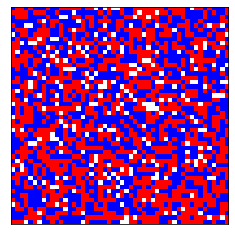

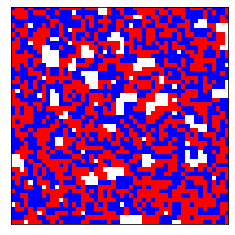

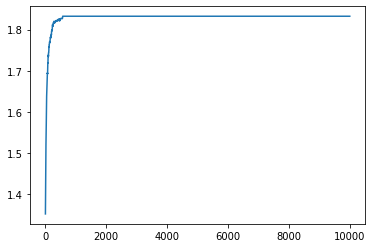

In [30]:
run_segregation3(50, 0, .1) 
# this is super interesting!! 
# Previously at a threshold of 0 no one moved, but people are moving now 
# beucase of vacant lots makign them unhappy and we see the vacancies being clustered 

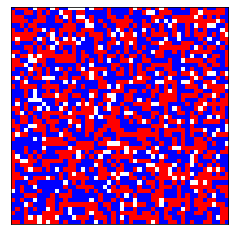

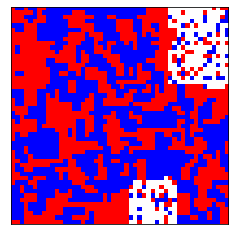

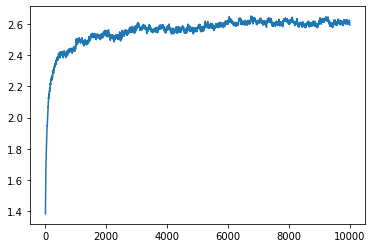

In [31]:
run_segregation3(50, 1, .1) 
# THIS LOOKS SO COOL, there is again pretty stark seperation between blue and red 
# to a greater extent at a threhsold of 1 but this is partially driven by also trying to move away from vacant lots. 
# There is more segregation here at a theshold of 1 than when looking at this same threshold in question one of the sassignment. 
# Here the segregation index ends at like 2.6 and in quesitno two (the replication of question one with seg index) it was at 2 

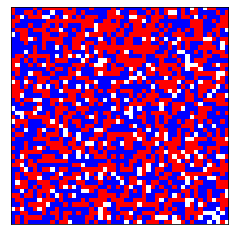

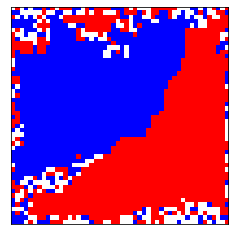

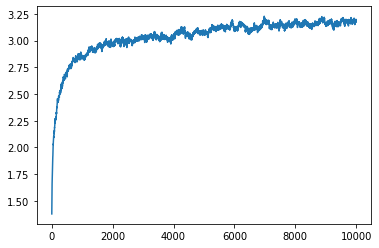

In [32]:
run_segregation3(50, 2, .1) 
# we see a lot of segregation at a threshold of 2. 
# segIndex here is above 3, but I think there may be some slight decrease in the clustering of vacancies here 
# compared to tolerance of 1... but hard to tell.

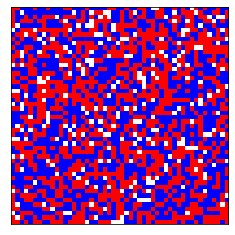

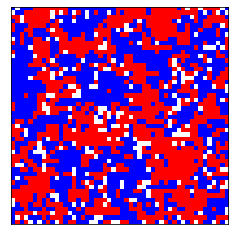

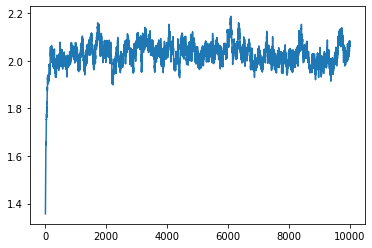

In [33]:
run_segregation3(50, 3, .1) 
# now we are definielty starting to see less of a clustering of the vacanc's 
# and also less of the huge clusters of red vs blue color, it seems like it is so hard for people to be happy, 
# so they keep moving but still are not happy 

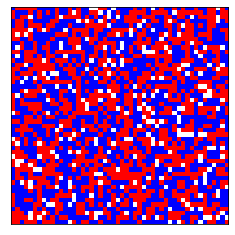

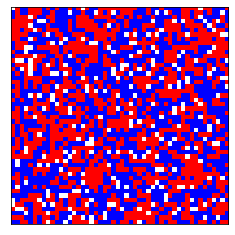

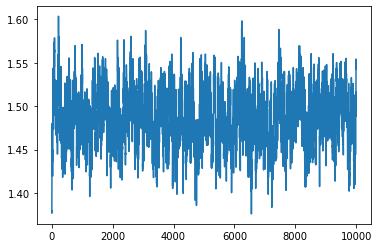

In [34]:
run_segregation3(50, 4, .1) 
#and we are back to randomness!! 
# I did not expect that the ngeative impact vacancies, 
# that it would make it harder for segregation to happen at a theshold of 3 and 4!! 
# Again becuase of little vacancy and lost of unhappiness due to both vacany 
# and not wanting to be by anyone that isnt your same color there is pure ranodmness 
# \beucase happiness is never met and this ranomness leads to less segregation... very unintuitive for me!!

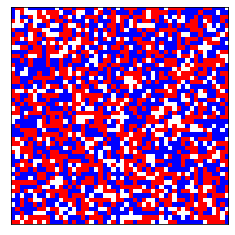

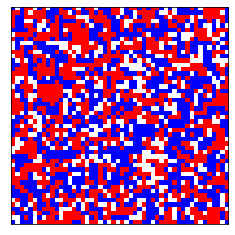

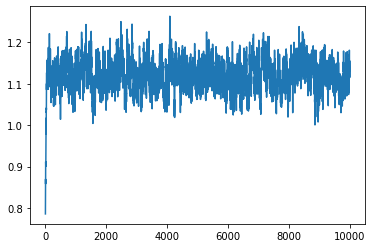

In [35]:
#looking at a threshold of 3, but increasing the number of vacancies 
# while still using the world where vacancies are negativly impacting happiness
run_segregation3(50, 3, .2)
#oaky no segregation still when increase vacancy number to .3 percent... at .2 percent vacancies we see a little bit more clustering...